In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from scipy import stats

In [2]:
def region_dynamic(focus, provinces, segments):
    focus = focus.loc[:,provinces].copy()
    for province in provinces:
        focus[province] = (focus[province] - focus[province].shift(1))
        
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,8))
    ax.set_yscale('log')
    ax.tick_params(labelrotation=90, labelsize=14)
#     ax.set_ylim(bottom=1)
    
    for i, province in enumerate(provinces):
        ax.scatter(focus.index, focus[province].copy(), s=45, label=province)
        ax.legend(prop={'size': 12}, 
#                  bbox_to_anchor=(1.04,1), loc="upper left"
                 )
        
        for a,b in segments[i]:
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log((focus+1)[province][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y, c='orangered')
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b-1)/2,np.exp(slope*(a+b-1)/2+intercept+0.3)), fontsize=14)

# South Korea

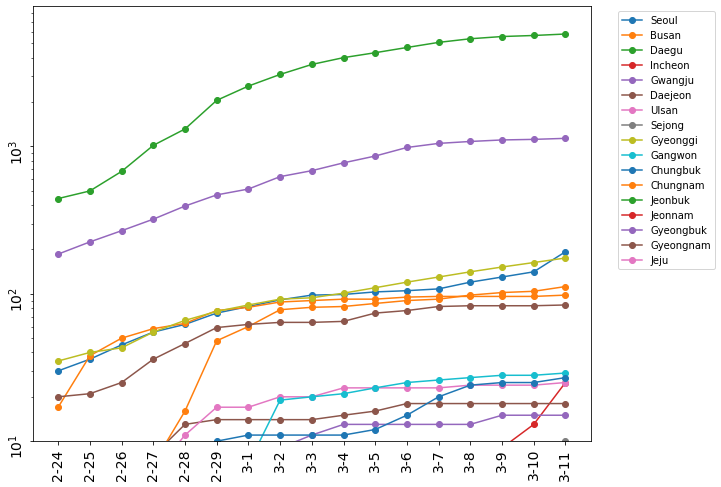

In [15]:
focus = pd.read_csv('data/Country detailed/Detailed Data - South Korea.csv', skiprows=[1]).set_index('Unnamed: 0').dropna(subset=['Daegu'])

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,8))
ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=14)
for i in list(focus)[:17]:
    ax.plot(focus.index, focus[i],'o-',label=i)
ax.set_ylim(bottom=10)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

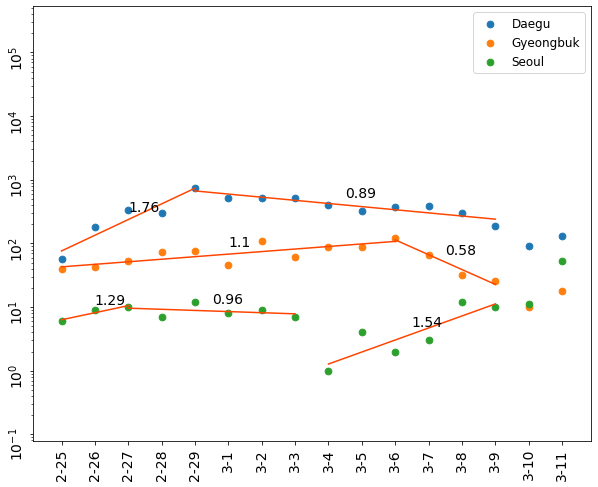

In [16]:
region_dynamic(focus, ['Daegu','Gyeongbuk','Seoul'],[[(1,6),(5,15)],[(1,12),(11,15)],[(1,4),(3,9),(9,15)]])   

# Iran

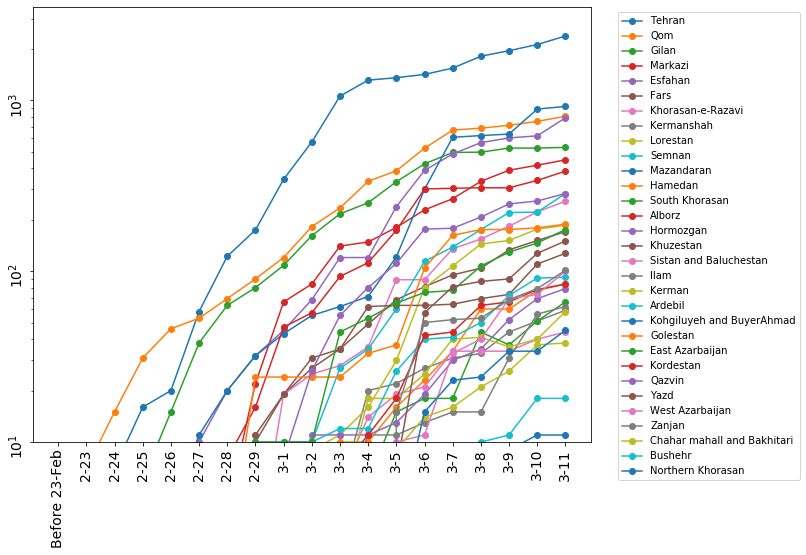

In [31]:
focus = pd.read_csv('data/Country detailed/Detailed Data - Iran.csv', skiprows=[1]).set_index('Time')

focus
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,8))
ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=14)
for i in list(focus)[:-4]:
    ax.plot(focus.index, focus[i],'o-',label=i)
ax.set_ylim(bottom=10)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

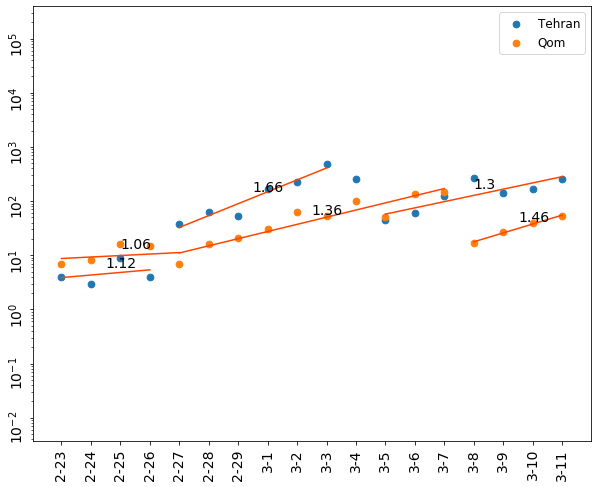

In [38]:
region_dynamic(focus, ['Tehran','Qom'],[[(1,5),(5,11),(12,19)],[(1,6),(5,15),(15,19)]])       

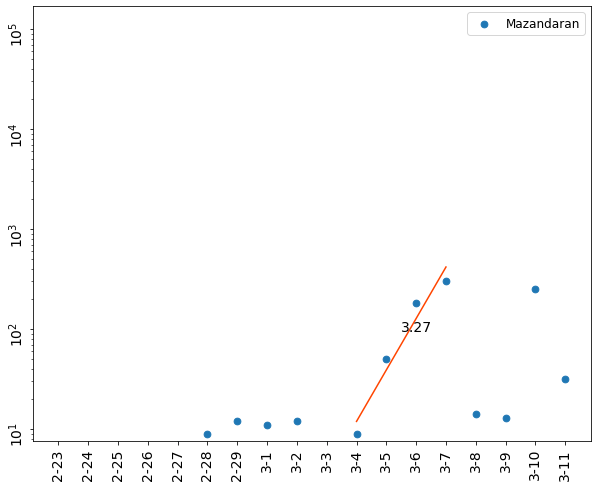

In [39]:
region_dynamic(focus, ['Mazandaran'],[[(11,15)]])   

# Italy

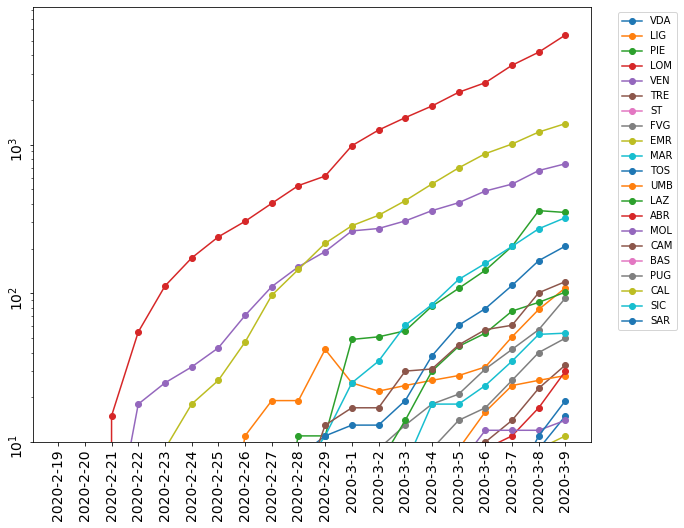

In [106]:
focus = pd.read_csv('data/Country detailed/Detailed Data - Italy.csv', skiprows=[0]).set_index('Date').iloc[19:,:]

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,8))
ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=14)
for i in list(focus)[2:-2]:
    ax.plot(focus.index, focus[i],'o-',label=i)
ax.set_ylim(bottom=10)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

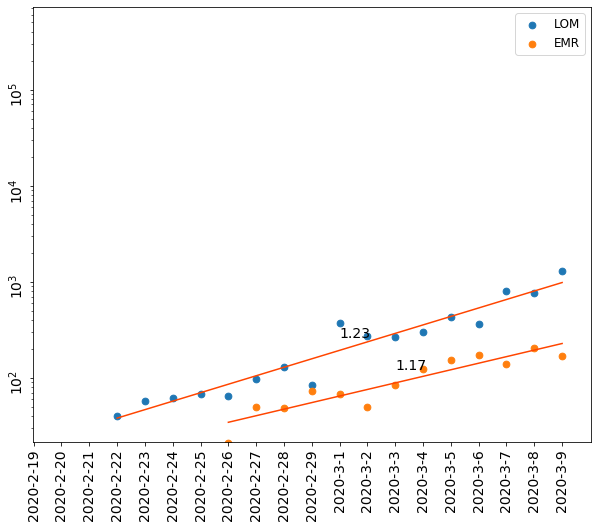

In [107]:
region_dynamic(focus, ['LOM','EMR'],[[(3,20)],[(7,20)]])       

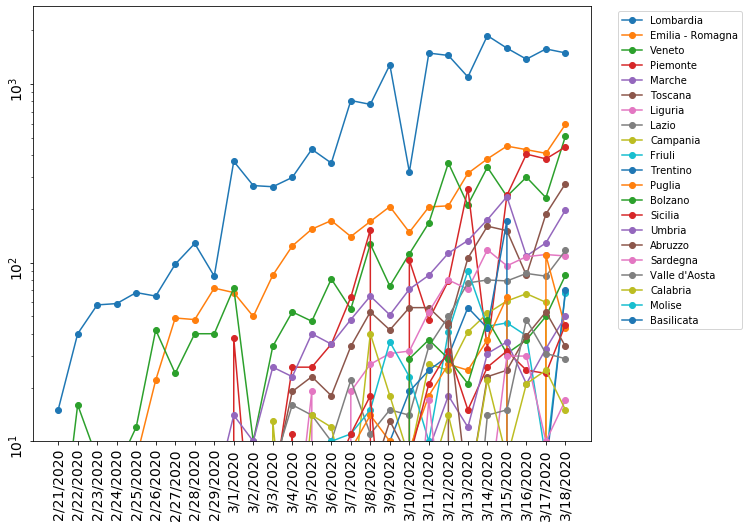

In [15]:
focus = pd.read_csv('data/2019-nCov stats - Italy.csv', skiprows=[1]).set_index(['Date']).iloc[2:-1,:-2].fillna(0)

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,8))
ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=14)
for i in list(focus):
    ax.plot(focus.index, focus[i],'o-',label=i)
ax.set_ylim(bottom=10)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")


In [90]:
heat = focus[focus>3].fillna(0).rolling(3, ).mean()
# heat = focus[focus>3].fillna(0).rolling(3, win_type='gaussian').mean(std=3)
for i in list(heat):
    heat[i] = heat[i] / heat[i].shift(1)

heat = heat.replace(np.inf, np.nan)
heat

,Lombardia,Emilia - Romagna,Veneto,Piemonte,Marche,Toscana,Liguria,Lazio,Campania,Friuli,...,Puglia,Bolzano,Sicilia,Umbria,Abruzzo,Sardegna,Valle d'Aosta,Calabria,Molise,Basilicata
Date,,,,,,,,,,,,,,,,,,,,,
2/21/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/22/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/23/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/24/2020,1.389381,2.285714,1.291667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/25/2020,1.178344,1.500000,0.870968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/26/2020,1.037838,1.625000,2.259259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/27/2020,1.203125,2.025641,1.278689,NaN,NaN,NaN,1.888889,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/28/2020,1.259740,1.506329,1.358974,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/29/2020,1.065292,1.420168,0.981132,1.000000,NaN,1.000000,0.470588,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


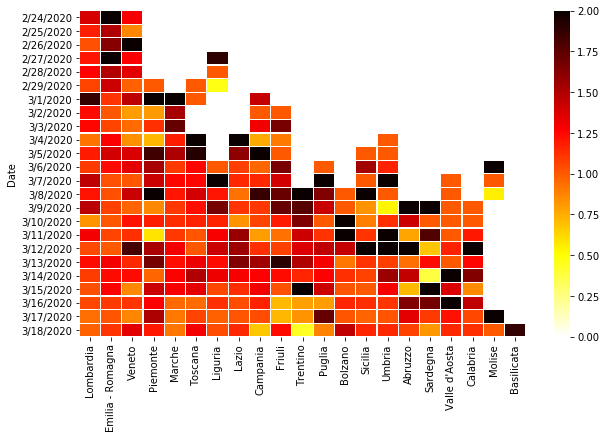

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,6))

sns.heatmap(heat.iloc[3:,:], linewidth=0.2, vmax=2, cmap='hot_r')
plt.savefig('figures/Daily_Misc_3_19.png',dpi=600)

---

# Germany

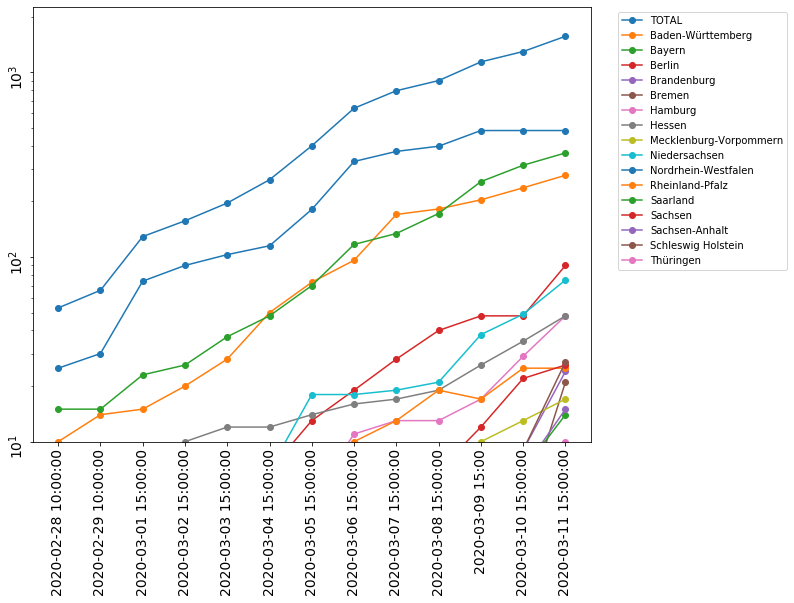

In [45]:
focus = pd.read_csv('data/country detailed/Detailed data - Germany.csv', skiprows=[0,1]).set_index('Unnamed: 0')
focus = focus.drop([focus.index[i] for i in [2,4,6,8,10,12,14,16,18]])

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,8))
ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=14)
for i in list(focus):
    ax.plot(focus.index, focus[i],'o-',label=i)
ax.set_ylim(bottom=10)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

# Italy, Germany and France comparison

In [96]:
df = pd.read_csv('data/2019-nCov stats - International.csv', ).set_index('time').T.dropna(how='all').drop(['Hongkong','Macao','Taiwan','Diamond Princess'],axis=1).drop('Alert Level')
#     .dropna(subset=['time']).set_index('time').dropna(how='all').drop(['Hongkong','Macao','Taiwan','Diamond Princess'],axis=1)

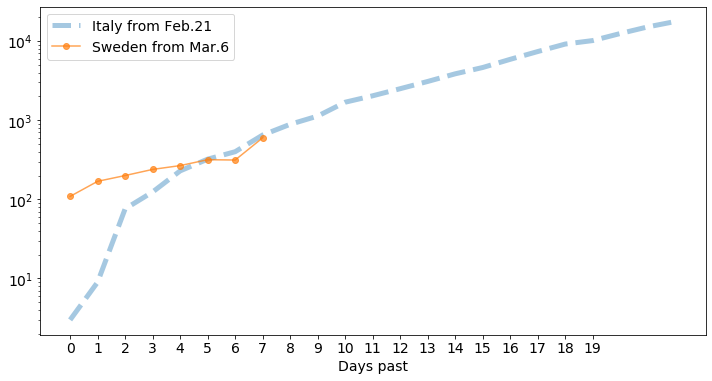

In [77]:
focus = df.copy()
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,5.4))

ax.set_yscale('log')
ax.plot(focus['Italy'].iloc[32:].values, ls='--', lw=5, alpha=0.4, label='Italy from Feb.21', )
# ax.plot(focus['Germany'].iloc[40:].values, marker='o', alpha=0.7, label='Germany from Feb.29')
# ax.plot(focus['France'].iloc[40:].values, marker='o', alpha=0.7, label='France from Feb.29')
# ax.plot(focus['Spain'].iloc[41:].values, marker='o', alpha=0.7, label='Spain from Mar.1')
# ax.plot(focus['Switzerland'].iloc[45:].values, marker='o', alpha=0.7, label='Switzerland from Mar.5')
# ax.plot(focus['UK'].iloc[46:].values, marker='o', alpha=0.7, label='UK from Mar.6')
# ax.plot(focus['Norway'].iloc[47:].values, marker='o', alpha=0.7, label='Norway from Mar.7')
# ax.plot(focus['Austria'].iloc[48:].values, marker='o', alpha=0.7, label='Austria from Mar.8')
# ax.plot(focus['Netherlands'].iloc[46:].values, marker='o', alpha=0.7, label='Netherlands from Mar.6')
# ax.plot(focus['Sweden'].iloc[46:].values, marker='o', alpha=0.7, label='Sweden from Mar.6')
# ax.plot(focus['Belgium'].iloc[47:].values, marker='o', alpha=0.7, label='Sweden from Mar.7')

# ax.set_ylim(top=4000)
ax.legend(fontsize=14)
ax.set_xlabel('Days past', size=14)
ax.set_xticks(np.arange(20))
ax.tick_params(labelsize=14)
plt.tight_layout()
# plt.savefig('figures/Daily_misc_3_15a.png',dpi=600)


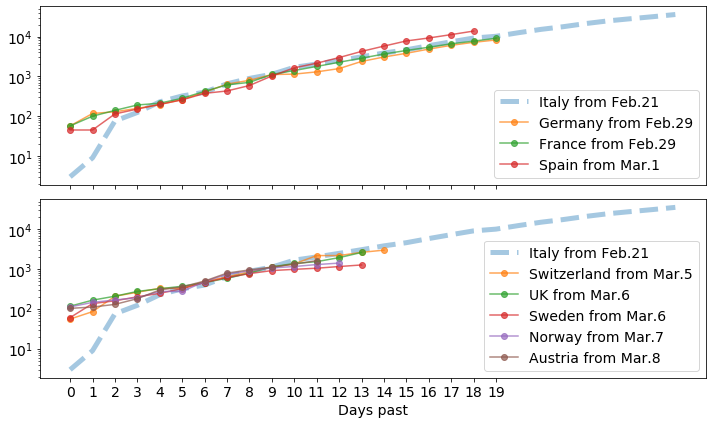

In [97]:
focus = df.copy()
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,6))
fig.subplots_adjust(wspace=0, hspace=0)

ax[0].set_yscale('log')
ax[0].plot(focus['Italy'].iloc[32:].values, ls='--', lw=5, alpha=0.4, label='Italy from Feb.21', )
ax[0].plot(focus['Germany'].iloc[40:].values, marker='o', alpha=0.7, label='Germany from Feb.29')
ax[0].plot(focus['France'].iloc[40:].values, marker='o', alpha=0.7, label='France from Feb.29')
ax[0].plot(focus['Spain'].iloc[41:].values, marker='o', alpha=0.7, label='Spain from Mar.1')

ax[1].plot(focus['Italy'].iloc[32:].values, ls='--', lw=5, alpha=0.4, label='Italy from Feb.21', )
ax[1].plot(focus['Switzerland'].iloc[45:].values, marker='o', alpha=0.7, label='Switzerland from Mar.5')
ax[1].plot(focus['UK'].iloc[46:].values, marker='o', alpha=0.7, label='UK from Mar.6')
ax[1].plot(focus['Sweden'].iloc[46:].values, marker='o', alpha=0.7, label='Sweden from Mar.6')
ax[1].plot(focus['Norway'].iloc[47:].values, marker='o', alpha=0.7, label='Norway from Mar.7')
ax[1].plot(focus['Austria'].iloc[48:].values, marker='o', alpha=0.7, label='Austria from Mar.8')

# ax.set_ylim(top=4000)
ax[1].set_yscale('log')
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[1].set_xlabel('Days past', size=14)
ax[1].set_xticks(np.arange(20))
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
plt.tight_layout()
# plt.savefig('figures/Daily_misc_3_17a.png',dpi=600)


NameError: name 't' is not defined

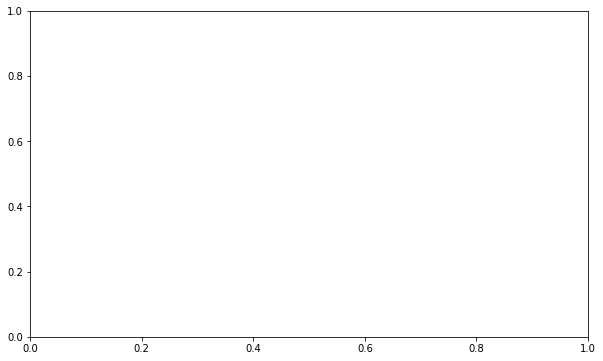

In [81]:
# t = pd.read_clipboard()
# t = t.set_index('Date')
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,6))
ax.plot(t.index, t.Total-t.Total.shift(1),'b-o', label='Daily new cases')
# ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=14)

ax.axvline(x=21, ymin=0, ymax=1, c='orangered', ls='--')
ax.annotate('Lodi province, 50k',xy=(20,100), rotation=90)
ax.axvline(x=37, ymin=0, ymax=1, c='orangered', ls='--')
ax.annotate('Northern Italy, 16M',xy=(36,100), rotation=90)
ax.axvline(x=38, ymin=0, ymax=1, c='orangered', ls='--')
ax.annotate('National, 60M',xy=(38.5,100), rotation=90)
ax.legend(fontsize=14)